In [42]:
import numpy as np
import os
import matplotlib.pyplot as plt
os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [2]:
# !pip install tensorflow-gpu==2.3.0
# !pip install sklearn

In [3]:
import tensorflow
import tensorflow as tf

In [4]:
tf.config.list_physical_devices('GPU')

[]

In [5]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [6]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 6272163979436403159,
 name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 2939573902133244571
 physical_device_desc: "device: XLA_CPU device"]

In [103]:
actions = [
    'punching',
    'kicking',
    'normal'
]

file_dir = 'C:/Users/BVer/are_you_ok/dataset/' #seq 파일을 dataset 폴더에 넣어주세요

npy_file = []
for name in os.listdir(file_dir):
    if not len(np.load(file_dir + name)) == 0:
        npy_file.append(np.load(file_dir + name))

data = np.concatenate(npy_file, axis=0)

data.shape

(77727, 30, 67)

In [8]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

print(x_data.shape)
print(labels.shape)

(77727, 30, 66)
(77727,)


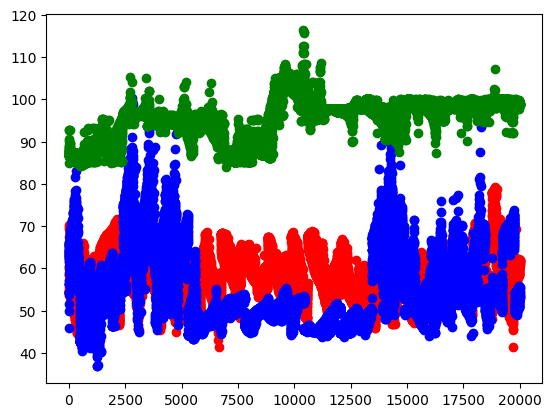

In [113]:
punching = []
kicking = []
normal = []

count = 0
for count in range(len(x_data)):
    temp_count = 0
    temp = 0
    for j in range(30):
        for i in range(54, 66):
            t = data[count][j][i]
    #         print(t)
            if t != 0 and not np.isnan(t):
                temp += int(t)
                temp_count += 1
    #             print(temp)
        if not temp_count == 0:
            if data[count][j][66] == 0 and len(punching) < 20000:
                punching.append(temp / temp_count)
            if data[count][j][66] == 1 and len(kicking) < 20000:
                kicking.append(temp / temp_count)
            if data[count][j][66] == 2 and len(normal) < 20000:
                normal.append(temp / temp_count)
            
plt.plot(punching, 'ro', kicking, 'bo', normal, 'go')
plt.show()

In [111]:
x = []
y = []

count = 0
# for count in range(30):
for i in range(66):
    print(x_data[0][1][i])
#         if i % 3 == 2:
#             continue
#         elif i % 3 == 0:
#             if x_data[0][count][i] != 0:
#                 x.append(x_data[0][count][i])
#         elif i % 3 == 1:
#             if x_data[0][count][i] != 0:
#                 y.append(x_data[0][count][i])       
#     plt.plot(x, y, 'ro')
#     plt.show()


994.0
481.0
0.94588494
947.0
528.0
0.85497266
901.0
505.0
0.79442245
831.0
597.0
0.7553285
806.0
669.0
0.7449592
994.0
551.0
0.82755166
995.0
645.0
0.88357294
1042.0
716.0
0.79192764
877.0
669.0
0.67073554
924.0
810.0
0.89807177
900.0
951.0
0.718573
925.0
692.0
0.72115016
947.0
810.0
0.71912706
902.0
949.0
0.67939246
972.0
458.0
0.852655
996.0
480.0
0.75006545
948.0
458.0
0.84792453
1018.0
481.0
0.16439408
71.56499
108.92458
79.29864
18.118267
63.315166
32.894066
90.16269
44.837482
28.095285
71.56503
18.201471
28.499908


In [ ]:
plt.plot(x, y, 'ro')
plt.show()

In [9]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions))
y_data.shape

(77727, 3)

In [10]:
from sklearn.model_selection import train_test_split

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(69954, 30, 66) (69954, 3)
(7773, 30, 66) (7773, 3)


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3]),
    Dense(32, activation='relu'),
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                33536     
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 99        
Total params: 35,715
Trainable params: 35,715
Non-trainable params: 0
_________________________________________________________________


In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3]),
    Dense(32, activation='relu'),
    Dense(len(actions), activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 64)                33536     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 99        
Total params: 35,715
Trainable params: 35,715
Non-trainable params: 0
_________________________________________________________________


In [37]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=200,
    callbacks=[
        ModelCheckpoint('models/model.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.1, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/200
2187/2187 [==============================] - ETA: 0s - loss: nan - acc: 0.1368
Epoch 00001: val_acc improved from -inf to 0.13714, saving model to models\model.h5
2187/2187 [==============================] - 14s 6ms/step - loss: nan - acc: 0.1368 - val_loss: nan - val_acc: 0.1371
Epoch 2/200
2183/2187 [============================>.] - ETA: 0s - loss: nan - acc: 0.1368
Epoch 00002: val_acc did not improve from 0.13714
2187/2187 [==============================] - 14s 6ms/step - loss: nan - acc: 0.1368 - val_loss: nan - val_acc: 0.1371
Epoch 3/200
2183/2187 [============================>.] - ETA: 0s - loss: nan - acc: 0.1368
Epoch 00003: val_acc did not improve from 0.13714
2187/2187 [==============================] - 14s 6ms/step - loss: nan - acc: 0.1368 - val_loss: nan - val_acc: 0.1371
Epoch 4/200
2180/2187 [============================>.] - ETA: 0s - loss: nan - acc: 0.1368
Epoch 00004: val_acc did not improve from 0.13714
2187/2187 [==============================] - 14s

KeyboardInterrupt: 

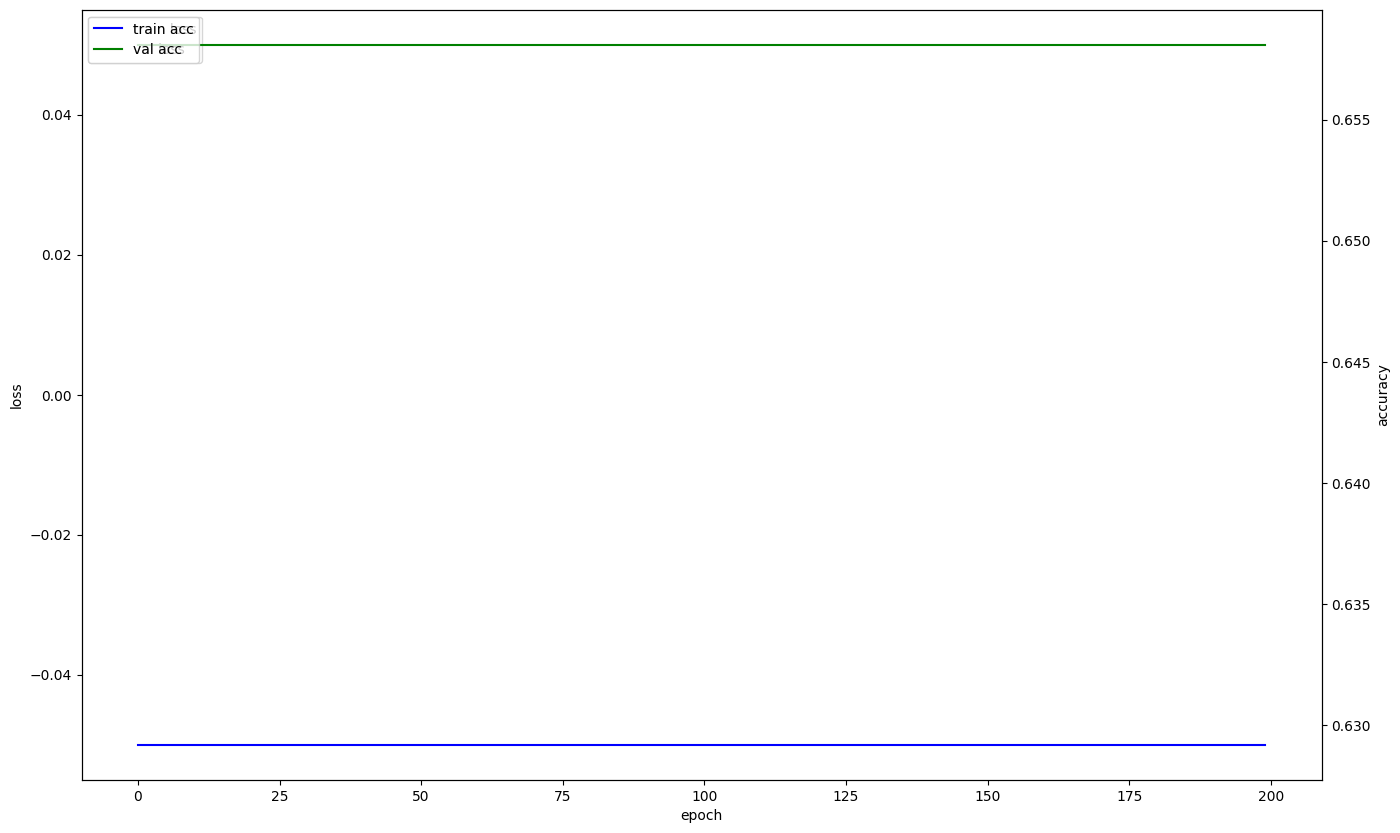

In [14]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [15]:
# model.save('210820_test1.h5')

In [13]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('./models/model.h5')

y_pred = model.predict(x_val)

multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

array([[[   0, 6707],
        [   0, 1066]],

       [[7214,    0],
        [ 559,    0]],

       [[1625,    0],
        [6148,    0]]], dtype=int64)

In [14]:
y_pred

array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       ...,
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32)

In [15]:
y_val

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [16]:
file_dir1 = 'C:/Users/BVer/are_you_ok/preprocessing'

In [31]:
raw_data = np.load(file_dir1 + '/punching/' + 'raw_punching_pushing_k3.mp4.npy')

In [22]:
raw_data = np.load(file_dir1 + '/kicking/' + 'raw_kicking_kicking_k24.mp4.npy')

In [26]:
raw_data = np.load(file_dir1 + '/normal/' + 'raw_normal_normal1.mp4.npy')

In [32]:
raw_data.shape

(72, 67)

In [33]:
def pred_raw(test):
    test = test[:, :-1]
    seq_length = 30
    seq = []
    action_seq = []
    actions = ['punching', 'kicking', 'normal']
#     print(x_test_data[0][0])
    for raw_data in test:
        seq.append(raw_data)
        if len(seq) < seq_length:
            continue
        print(len(seq))
        input_data = np.expand_dims(np.array(seq[-seq_length:], dtype=np.float32), axis=0)
        y_pred = model.predict(input_data).squeeze()
        
        print(y_pred)

        i_pred = int(np.argmax(y_pred))
        conf = y_pred[i_pred]

        if conf < 0.9:
            continue

        action = actions[i_pred]
        action_seq.append(action)

        if len(action_seq) < 3:
            continue

        this_action = '?'
        if action_seq[-1] == action_seq[-2] == action_seq[-3]:
            this_action = action

        print(this_action)

In [34]:
pred_raw(raw_data)

30
[nan nan nan]
31
[nan nan nan]
32
[nan nan nan]
punching
33
[nan nan nan]
punching
34
[nan nan nan]
punching
35
[nan nan nan]
punching
36
[nan nan nan]
punching
37


C:\Users\BVer\miniconda3\envs\ayo2\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in less


[nan nan nan]
punching
38
[nan nan nan]
punching
39
[nan nan nan]
punching
40
[nan nan nan]
punching
41
[nan nan nan]
punching
42
[nan nan nan]
punching
43
[nan nan nan]
punching
44
[nan nan nan]
punching
45
[nan nan nan]
punching
46
[nan nan nan]
punching
47
[nan nan nan]
punching
48
[nan nan nan]
punching
49
[nan nan nan]
punching
50
[nan nan nan]
punching
51
[nan nan nan]
punching
52
[nan nan nan]
punching
53
[nan nan nan]
punching
54
[nan nan nan]
punching
55
[nan nan nan]
punching
56
[nan nan nan]
punching
57
[nan nan nan]
punching
58
[nan nan nan]
punching
59
[nan nan nan]
punching
60
[nan nan nan]
punching
61
[nan nan nan]
punching
62
[nan nan nan]
punching
63
[nan nan nan]
punching
64
[nan nan nan]
punching
65
[nan nan nan]
punching
66
[nan nan nan]
punching
67
[nan nan nan]
punching
68
[nan nan nan]
punching
69
[nan nan nan]
punching
70
[nan nan nan]
punching
71
[nan nan nan]
punching
72
[nan nan nan]
punching


In [111]:
def pred_(test):
    test_data = np.concatenate([test], axis=0)
    x_test_data = test_data[:, :, :-1]
    test_labels = test_data[:, 0, -1]

    print(x_test_data.shape)
    print(test_labels.shape)

    x_test_data = x_test_data.astype(np.float32)
    
    print(x_test_data[0])
#     print(x_test_data[0][0])
    for input_data in x_test_data:
        if len(seq) < seq_length:
            continue
        print(len(seq))
        input_data = np.expand_dims(np.array(seq[-seq_length:], dtype=np.float32), axis=0)

        y_pred = model.predict(input_data).squeeze()

        i_pred = int(np.argmax(y_pred))
        conf = y_pred[i_pred]
        print(conf)

        if conf < 0.9:
            continue

        action = actions[i_pred]
        action_seq.append(action)

        if len(action_seq) < 3:
            continue

        this_action = '?'
        if action_seq[-1] == action_seq[-2] == action_seq[-3]:
            this_action = action

        print(this_action)